In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import nltk
from bs4 import BeautifulSoup
from nltk.tokenize import RegexpTokenizer

In [49]:
url = "https://www.gutenberg.org/files/35/35-0.txt"

In [50]:
response = requests.get(url)

In [51]:
soup_dos = BeautifulSoup(response.content, "html.parser")

In [52]:
len(soup_dos)

1

In [53]:
dos_text = soup_dos.get_text()

In [54]:
type(dos_text)

str

In [55]:
len(dos_text)

202715

In [56]:
dos_text[:100]

'\r\nThe Project Gutenberg EBook of The Time Machine, by H. G. Wells\r\n\r\nThis eBook is for the use of an'

In [57]:
tokenizer = RegexpTokenizer('\w+')

In [58]:
tokens = tokenizer.tokenize(dos_text)

In [59]:
tokens[:20]

['The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'The',
 'Time',
 'Machine',
 'by',
 'H',
 'G',
 'Wells',
 'This',
 'eBook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone']

In [60]:
words = []
for word in tokens:
    words.append(word.lower())

In [61]:
words[:20]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'the',
 'time',
 'machine',
 'by',
 'h',
 'g',
 'wells',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone']

In [62]:
text = nltk.Text(tokens)

In [63]:
text[:10]

['The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'The',
 'Time',
 'Machine',
 'by',
 'H']

In [64]:
fdist = nltk.FreqDist(text)

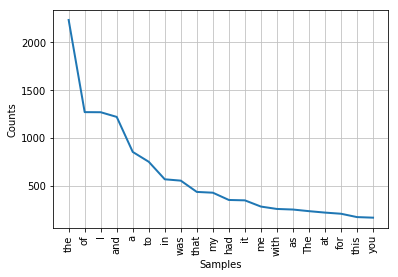

In [67]:
plt.figure()
fdist.plot(20)

In [80]:
common = fdist.most_common(20)

In [81]:
common

[('the', 2231),
 ('of', 1268),
 ('I', 1267),
 ('and', 1218),
 ('a', 852),
 ('to', 749),
 ('in', 566),
 ('was', 552),
 ('that', 434),
 ('my', 426),
 ('had', 350),
 ('it', 346),
 ('me', 281),
 ('with', 256),
 ('as', 250),
 ('The', 233),
 ('at', 218),
 ('for', 206),
 ('this', 171),
 ('you', 165)]

In [93]:
from nltk.corpus import stopwords

In [95]:
stop_words = set(stopwords.words('english'))

In [97]:
filter_text = [w for w in text if not w in stop_words]

In [99]:
fdist_filter = nltk.FreqDist(filter_text)

In [100]:
fdist_filter.most_common(20)

[('I', 1267),
 ('The', 233),
 ('Time', 129),
 ('little', 112),
 ('upon', 110),
 ('It', 105),
 ('came', 105),
 ('one', 99),
 ('And', 95),
 ('But', 95),
 ('could', 92),
 ('said', 89),
 ('saw', 88),
 ('Project', 84),
 ('Gutenberg', 84),
 ('time', 81),
 ('Then', 81),
 ('seemed', 72),
 ('like', 71),
 ('thing', 64)]

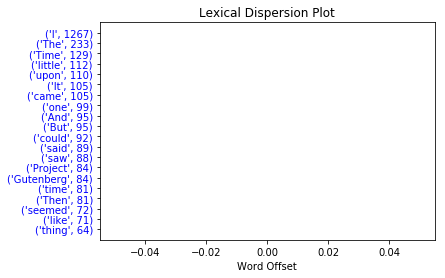

In [101]:
text.dispersion_plot(fdist_filter.most_common(20))

^^^Not sure what to do for dispersion...

In [102]:
bigrams = nltk.bigrams(filter_text)

In [103]:
fdistbi = nltk.FreqDist(bigrams)

In [88]:
fdistbi.most_common(20)

[(('of', 'the'), 337),
 (('in', 'the'), 176),
 (('I', 'had'), 130),
 (('I', 'was'), 112),
 (('and', 'the'), 102),
 (('to', 'the'), 100),
 (('Project', 'Gutenberg'), 84),
 (('of', 'a'), 78),
 (('the', 'Time'), 73),
 (('I', 'saw'), 68),
 (('I', 'could'), 67),
 (('Time', 'Traveller'), 63),
 (('it', 'was'), 62),
 (('as', 'I'), 61),
 (('in', 'a'), 60),
 (('that', 'I'), 59),
 (('and', 'I'), 56),
 (('Gutenberg', 'tm'), 56),
 (('for', 'the'), 53),
 (('to', 'me'), 49)]

In [119]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS

In [141]:
wordcloud = WordCloud(background_color = 'black').generate(str(filter_text))

In [142]:
print(wordcloud)

(-0.5, 399.5, 199.5, -0.5)

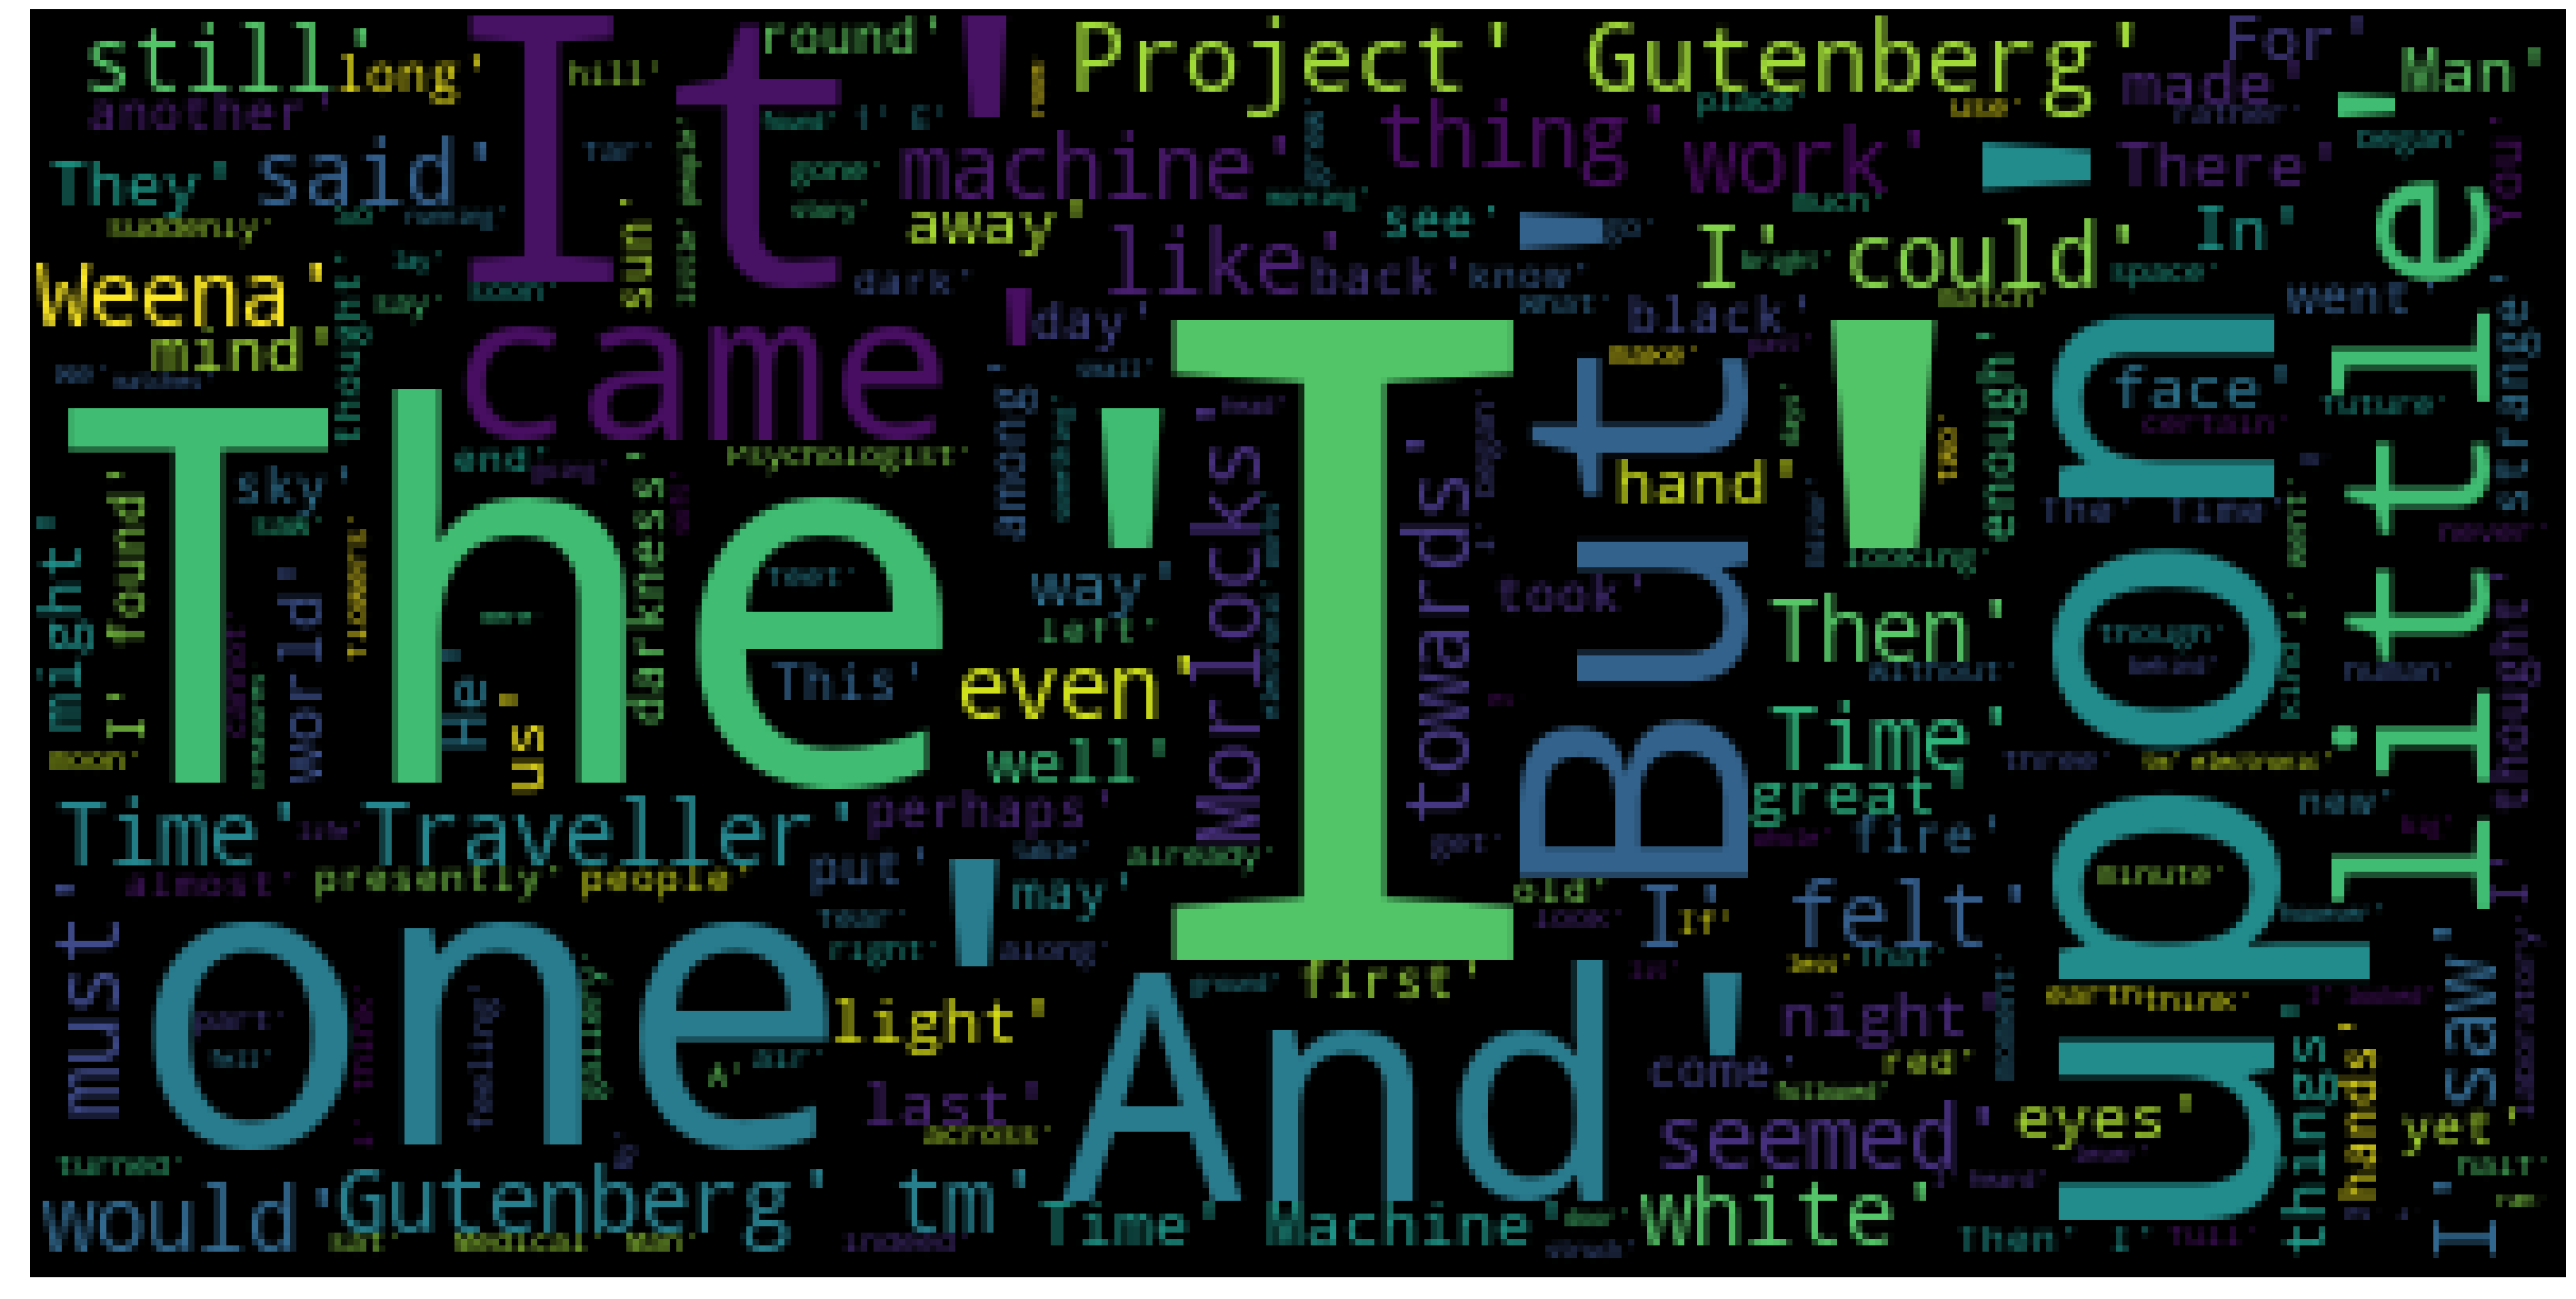

In [143]:
plt.figure(figsize = (50, 50))
plt.imshow(wordcloud)
plt.axis('off')

***Still stuck on bar plot